In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
try:
  import google.colab
  IN_COLAB = True  
except:
  IN_COLAB = False
  
if IN_COLAB:
  from google.colab import drive
  #monta o drive do google drive
  drive.mount("/content/drive") 

  import os
  #muda o diretório do google drive para o indicado abaixo
  os.chdir("/content/drive/My Drive/Colab Notebooks")

In [ ]:
from os import listdir

if IN_COLAB:
    #main directory path
    maindirectory = "./imgsdogsandcats"

    directorydogs = "./imgsdogsandcats/dogs"

    directorycats = "./imgsdogsandcats/cats"
    
else:
    #main directory path
    maindirectory = "\\imgsdogsandcats"

    directorydogs = "\\imgsdogsandcats\\dogs"

    directorycats = "\\imgsdogsandcats\\cats"

directory=directorydogs

for name in listdir(directory):
  print(name)

'\nfrom os import listdir\n\nif IN_COLAB:\n    #main directory path\n    maindirectory = "./imgsdogsandcats"\n\n    directorydogs = "./imgsdogsandcats/dogs"\n\n    directorycats = "./imgsdogsandcats/cats"\n    \nelse:\n    #main directory path\n    maindirectory = "\\imgsdogsandcats"\n\n    directorydogs = "\\imgsdogsandcats\\dogs"\n\n    directorycats = "\\imgsdogsandcats\\cats"\n\ndirectory=directorydogs\n\nfor name in listdir(directory):\n  print(name)\n'

In [4]:
from os import listdir

from keras.utils import load_img
from keras.utils import img_to_array

import pandas as pd
import numpy as np

if IN_COLAB:
    #main directory path
    maindirectory = "./imgsdogsandcats"

    directorydogs = "./imgsdogsandcats/dogs"

    directorycats = "./imgsdogsandcats/cats"
    
else:
    #main directory path
    maindirectory = ".\\imgsdogsandcats"

    directorydogs = ".\\imgsdogsandcats\\dogs"                       

    directorycats = ".\\imgsdogsandcats\\cats"

#set here the total number of imagens in all classes
numberofimages=30

images=[]
labels=[]

#prepare images02 to the necessary shape to csv case
images02 = np.random.rand(numberofimages*100*100*3) 
images02 = images02.reshape((numberofimages,100,100,3))

#create dataframe to store the data and aftermost save in files   
results=pd.DataFrame(columns=['image','label'])

cont=0

In [6]:
#load dataset of dogs
directory=directorydogs

for name in listdir(directory):
    # load an image from file
    if IN_COLAB:
        filename = directory + '/' + name
    else:
        filename = directory + '\\' + name
    #print("filename=",filename)
    image = load_img(filename, target_size=(100, 100))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
        
    # reshape data for the model
    image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
    
    #label of the image
    label="dog"
    
    images02[cont]=image
    cont=cont+1
    
    images.append(image)
    labels.append(label)
    
#load dataset of cats
directory=directorycats

for name in listdir(directory):
    # load an image from file
    if IN_COLAB:
        filename = directory + '/' + name
    else:
        filename = directory + '\\' + name
    #print("filename=",filename)
    image = load_img(filename, target_size=(100, 100))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    
    # reshape data for the model
    image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
    
    #label of the image
    label="cat"
    
    images02[cont]=image
    cont=cont+1
    
    images.append(image)
    labels.append(label)    

#update dataframe results with images and labels sets
results['image']=images
results['label']=labels

#save dataframe as pickle (binary) file
if IN_COLAB:
    results.to_pickle(maindirectory + '/' +"dogsandcats.pkl")
else:
    results.to_pickle(maindirectory + '\\' +"dogsandcats.pkl")
print("File dogsandcats.pkl Saved!!!") 

for i in range(0,len(images)):
    x=images[i]
    x=x.reshape((1,100*100*3))
    images[i]=x

results['image']=images    
import sys
np.set_printoptions(threshold=sys.maxsize)
if IN_COLAB:    
    results.to_csv(maindirectory + '/' +"dogsandcats.csv",index=False, sep=';')
else:
    results.to_csv(maindirectory + '\\' +"dogsandcats.csv",index=False, sep=';')

print("File dogsandcats.csv Saved!!!")
   

File dogsandcats.pkl Saved!!!
File dogsandcats.csv Saved!!!


In [7]:
#Reading data of pickle file
if IN_COLAB:
    data = pd.read_pickle(maindirectory + '/' +"dogsandcats.pkl")
else:
    data = pd.read_pickle(maindirectory + '\\' +"dogsandcats.pkl")

print("File dogsandcats.pkl Readed!!!")

print("Describing the data: ",data.describe())
print("Info of the data:",data.info())

print("10 first samples of the dataset:",data.head(10))
print("10 last samples of the dataset:",data.tail(10))

File dogsandcats.pkl Readed!!!
Describing the data:                                                      image label
count                                                  30    30
unique                                                 30     2
top     [[[252.0, 247.0, 243.0], [252.0, 247.0, 243.0]...   dog
freq                                                    1    15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   30 non-null     object
 1   label   30 non-null     object
dtypes: object(2)
memory usage: 608.0+ bytes
Info of the data: None
10 first samples of the dataset:                                                image label
0  [[[252.0, 247.0, 243.0], [252.0, 247.0, 243.0]...   dog
1  [[[203.0, 203.0, 205.0], [205.0, 205.0, 207.0]...   dog
2  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...   dog
3  [[[226.0, 210.0, 197.0], [225.0, 209.0, 1

In [8]:
#Reshape the data of images to the correct shape
tam=len(data['image'])
trainX=np.ones((tam,100,100,3), dtype=float)

for i in range(0,tam):
    trainX[i]=data['image'][i].reshape((100, 100, 3))     

In [9]:
# convert from integers to floats
trainX = trainX.astype('float32')
trainX = trainX / 255.0 

How many images do you want to show (max= 30 ):
30


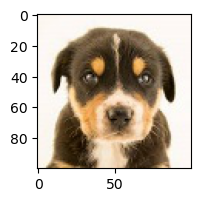

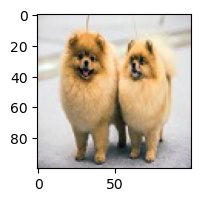

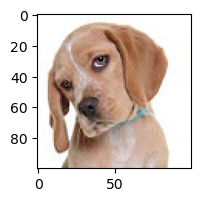

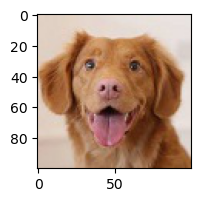

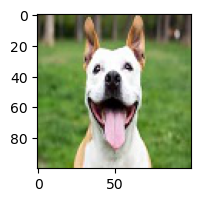

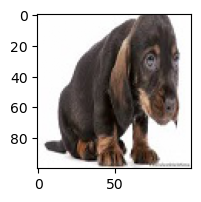

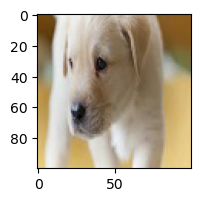

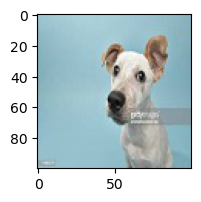

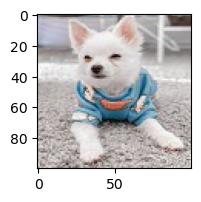

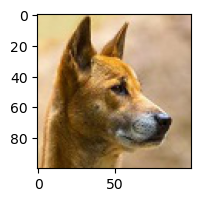

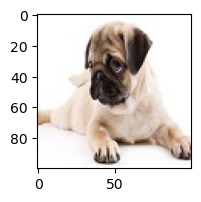

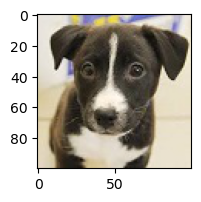

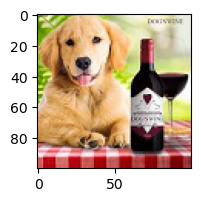

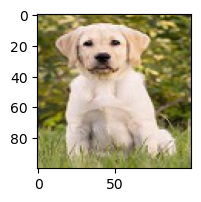

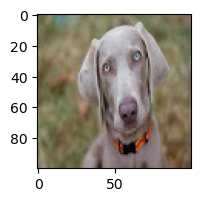

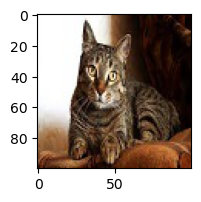

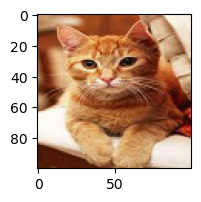

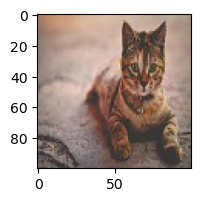

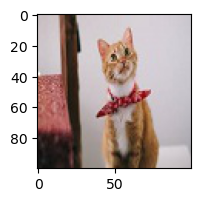

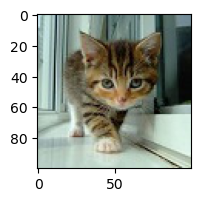

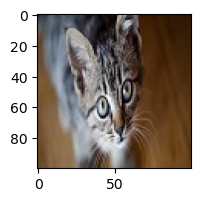

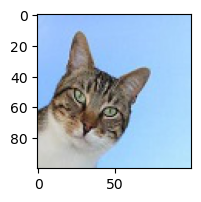

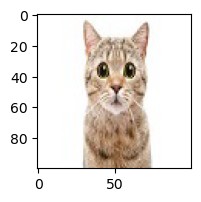

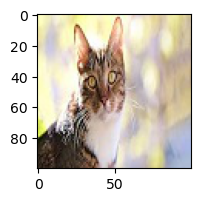

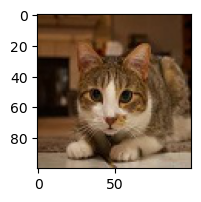

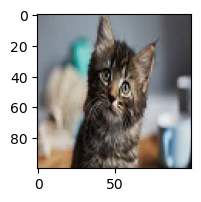

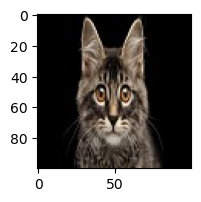

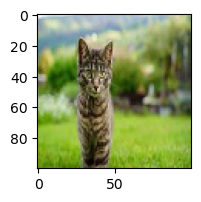

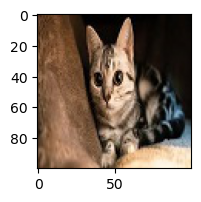

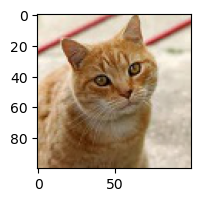

In [10]:
#Showing the images loaded
print("How many images do you want to show (max=",numberofimages,"):")
quant=int(input())

if quant <= numberofimages:
    import matplotlib.pyplot as plt
    for i in range(0,quant):
        fig = plt.figure(figsize = (2,2)) 
        plt.imshow(trainX[i])
        plt.show()
else:
    print("Invalid number, greater than number of images=",numberofimages)

In [11]:
'''
import ast
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))
'''    

"\nimport ast\ndef from_np_array(array_string):\n    array_string = ','.join(array_string.replace('[ ', '[').split())\n    return np.array(ast.literal_eval(array_string))\n"

In [12]:
#Reading data of  CSV file
if IN_COLAB:
    data=pd.read_csv(maindirectory + '/' +"dogsandcats.csv", sep=';')
else:
    data=pd.read_csv(maindirectory + '\\' +"dogsandcats.csv", sep=';')
#print("Describing the data: ",data.describe())
#print("Info of the data:",data.info())

#print("10 first samples of the dataset:",data.head(10))
#print("10 last samples of the dataset:",data.tail(10))


In [13]:
display(data)

,image,label
0,[[252. 247. 243. 252. 247. 243. 252. 247. 241....,dog
1,[[203. 203. 205. 205. 205. 207. 209. 209. 211....,dog
2,[[255. 255. 255. 255. 255. 255. 255. 255. 255....,dog
3,[[226. 210. 197. 225. 209. 196. 226. 210. 197....,dog
4,[[ 63. 49. 36. 67. 62. 42. 68. 71. 40....,dog
5,[[254. 254. 254. 254. 254. 254. 254. 254. 254....,dog
6,[[107. 74. 23. 109. 74. 16. 112. 74. 9....,dog
7,[[160. 198. 211. 161. 199. 212. 160. 198. 211....,dog
8,[[145. 158. 190. 129. 140. 170. 128. 135. 163....,dog
9,[[231. 216. 157. 231. 216. 157. 231. 216. 157....,dog


In [14]:
#Cleaning the data of the image saved as string
for i in range(0,len(data)):
    '''
    data['image'][i] = data['image'][i].replace('[','')
    data['image'][i] = data['image'][i].replace(']','')
    #data['image'][i] = data['image'][i].replace('\n',',')
    data['image'][i] = data['image'][i].replace('.\n.\n.','')
    data['image'][i] = data['image'][i].replace('.\n',',')
    data['image'][i] = data['image'][i].replace('.',',')
    ''' 
    data['image'][i] = data['image'][i].replace('\n',',')
    data['image'][i] = data['image'][i].replace(',,,',',')
    data['image'][i] = data['image'][i].replace(',,',',')
    data['image'][i] = data['image'][i].replace('.',',')
    data['image'][i] = data['image'][i].replace(',]',']')
    #data['image'][i] = data['image'][i].replace('"','')
    data['image'][i] = data['image'][i].replace('[','')
    data['image'][i] = data['image'][i].replace(']','')
    data['image'][i] = data['image'][i].replace('  ',' ')
    data['image'][i] = data['image'][i].replace('   ',' ')
    #data['image'][i] = data['image'][i].replace(', ',',')
    data['image'][i] = data['image'][i].replace(',,',',')
    #'''
    

#print(data['image'][0])

In [15]:
#Transforming the image in string format to the correct shape and type
for i in range(0,len(data['image'])):
    x=data['image'][i]
    
    x=np.fromstring(data['image'][i], dtype=int, sep=',')
    x=x.reshape(100,100,3)
    
    data['image'][i]=x
 

In [16]:
#geting the images on the correct shape and type
tam=len(data['image'])
trainX=np.ones((tam,100,100,3), dtype=float)

for i in range(0,tam):
    trainX[i]=data['image'][i] 

In [17]:
# convert from integers to floats
trainX = trainX.astype('float32')
trainX = trainX / 255.0 

How many images do you want to show (max= 30 ):
30


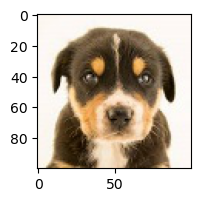

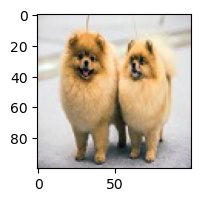

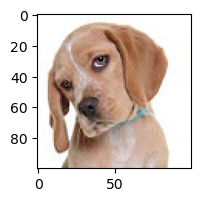

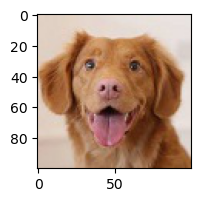

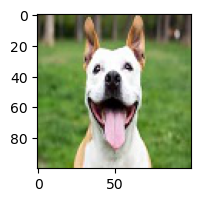

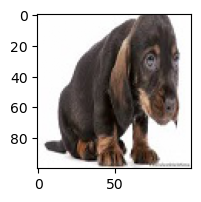

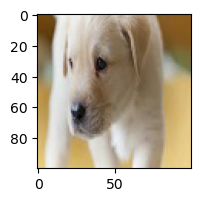

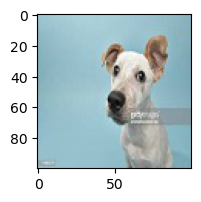

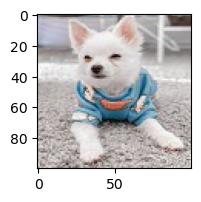

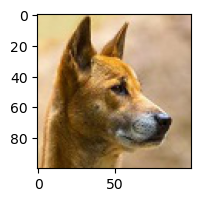

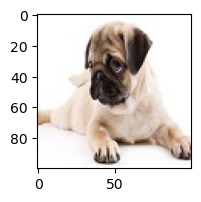

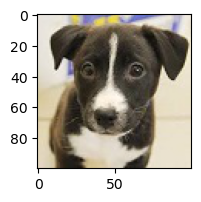

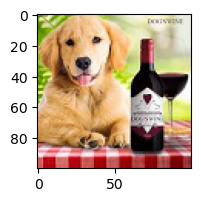

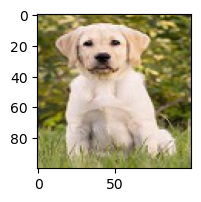

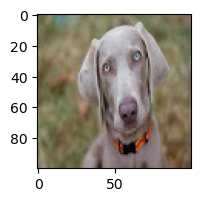

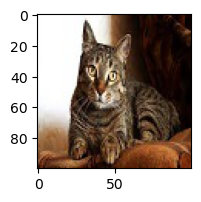

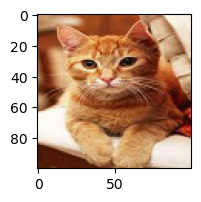

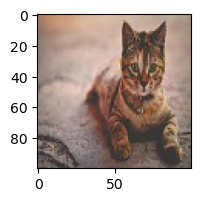

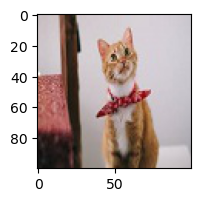

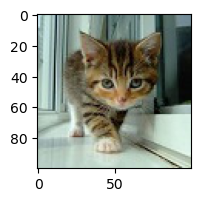

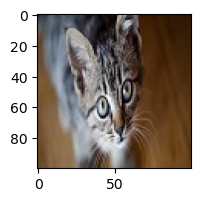

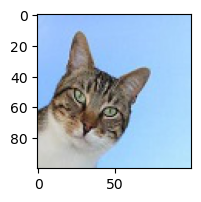

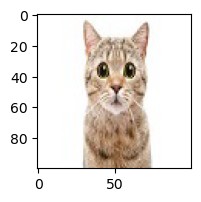

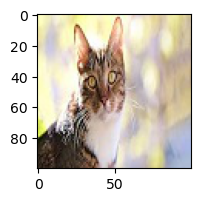

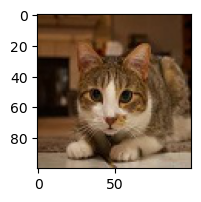

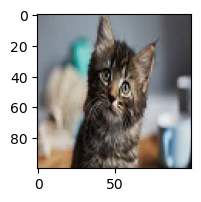

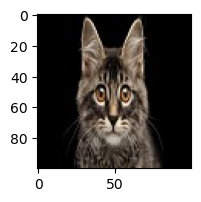

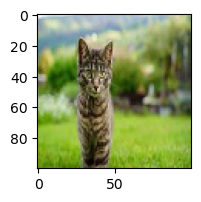

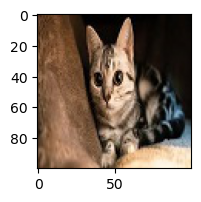

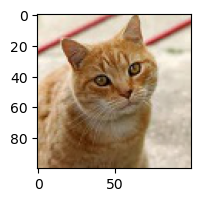

In [18]:
#Showing the images loaded
print("How many images do you want to show (max=",numberofimages,"):")
quant=int(input())

if quant <= numberofimages:
    import matplotlib.pyplot as plt
    for i in range(0,quant):
        fig = plt.figure(figsize = (2,2)) 
        plt.imshow(trainX[i])
        plt.show()
else:
    print("Invalid number, greater than number of images=",numberofimages)